# Linear Regression
Example with Linear Regression

### Dependencies installation

In [19]:
%pip install numpy
%pip install matplotlib
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### 1. Dataset randomly generated

In [24]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X
y

array([[ 8.75067   ],
       [ 4.79875702],
       [ 9.95907684],
       [ 4.54882978],
       [ 9.77299352],
       [ 5.9258885 ],
       [ 7.81663554],
       [ 5.89414682],
       [ 5.76726945],
       [ 7.52578596],
       [ 7.70837539],
       [ 5.47921118],
       [ 7.86446398],
       [ 4.21138945],
       [10.54117166],
       [10.79037398],
       [ 9.12530524],
       [ 5.39301587],
       [ 5.3381902 ],
       [ 7.89997888],
       [ 5.67120605],
       [10.52013458],
       [ 6.81994702],
       [ 5.43695429],
       [ 8.25093242],
       [ 4.70376268],
       [ 3.65071619],
       [ 8.16418653],
       [ 4.89225421],
       [ 6.64485417],
       [ 5.28018098],
       [ 7.57907292],
       [ 8.88290085],
       [ 9.46380624],
       [10.69024786],
       [ 9.84387697],
       [ 8.39457909],
       [ 6.04455573],
       [ 6.9826837 ],
       [ 8.60601758],
       [ 7.8697976 ],
       [ 4.16959087],
       [ 8.94907687],
       [ 6.37733112],
       [ 9.68499733],
       [ 6

#### 2. Visualizing the dataset

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

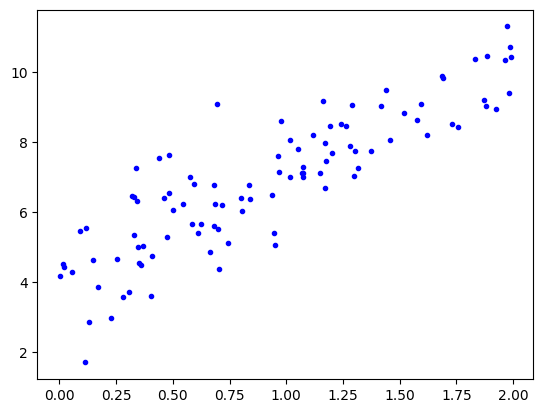

In [14]:
plt.plot(X, y, "b.")
plt.show()

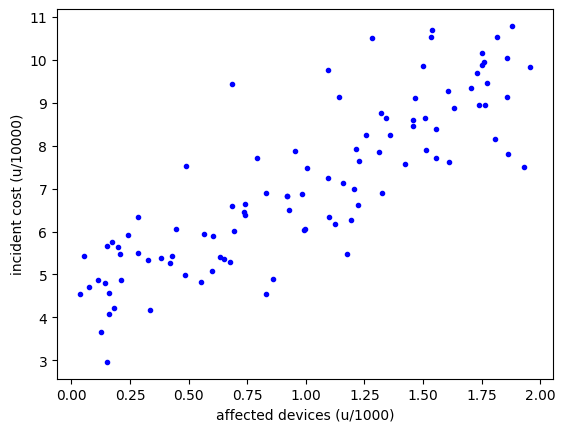

In [25]:
plt.plot(X, y, "b.")
plt.xlabel("affected devices (u/1000)")
plt.ylabel("incident cost (u/10000)")
plt.show()

##### 3. Modification of the dataset

In [26]:
import pandas as pd
data = {'#_affected_devices': X.flatten(), 'cost': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,#_affected_devices,cost
0,1.319057,8.750670
1,0.144464,4.798757
2,1.760441,9.959077
3,0.035044,4.548830
4,1.094830,9.772994
5,0.243017,5.925888
6,1.861741,7.816636
7,0.604208,5.894147
8,0.173639,5.767269
9,0.488668,7.525786


In [27]:
# Scale the data
df['#_affected_devices'] = df['#_affected_devices'] * 1000
df['#_affected_devices'] = df['#_affected_devices'].astype('int')
df['cost'] = df['cost'] * 10000
df['cost'] = df['cost'].astype('int')
df.head(10)

,#_affected_devices,cost
0,1319,87506
1,144,47987
2,1760,99590
3,35,45488
4,1094,97729
5,243,59258
6,1861,78166
7,604,58941
8,173,57672
9,488,75257


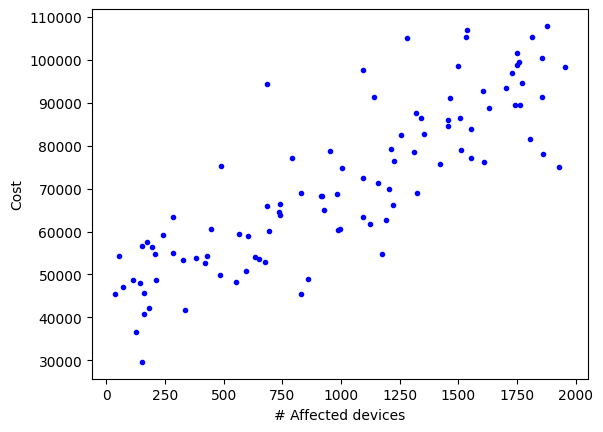

In [28]:
plt.plot(df['#_affected_devices'], df['cost'], "b.")
plt.xlabel("# Affected devices")
plt.ylabel('Cost')
plt.show()